In [2]:
import pandas as pd
import numpy as np

In [3]:
import pandas as pd

# Reading the CSV files
d1 = pd.read_csv("student-mat.csv", sep=";")
d2 = pd.read_csv("student-por.csv", sep=";")

# Merging the DataFrames on specified columns
merge_columns = ["school", "sex", "age", "address", "famsize", "Pstatus", "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet"]
d3 = pd.merge(d1, d2, on=merge_columns)

# Print the number of rows in the merged DataFrame
print(f"Number of students: {len(d3)}")
d3.head()


Number of students: 382


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_y,freetime_y,goout_y,Dalc_y,Walc_y,health_y,absences_y,G1_y,G2_y,G3_y
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
d1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
print(d3.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian_x', 'traveltime_x', 'studytime_x',
       'failures_x', 'schoolsup_x', 'famsup_x', 'paid_x', 'activities_x',
       'nursery', 'higher_x', 'internet', 'romantic_x', 'famrel_x',
       'freetime_x', 'goout_x', 'Dalc_x', 'Walc_x', 'health_x', 'absences_x',
       'G1_x', 'G2_x', 'G3_x', 'guardian_y', 'traveltime_y', 'studytime_y',
       'failures_y', 'schoolsup_y', 'famsup_y', 'paid_y', 'activities_y',
       'higher_y', 'romantic_y', 'famrel_y', 'freetime_y', 'goout_y', 'Dalc_y',
       'Walc_y', 'health_y', 'absences_y', 'G1_y', 'G2_y', 'G3_y'],
      dtype='object')


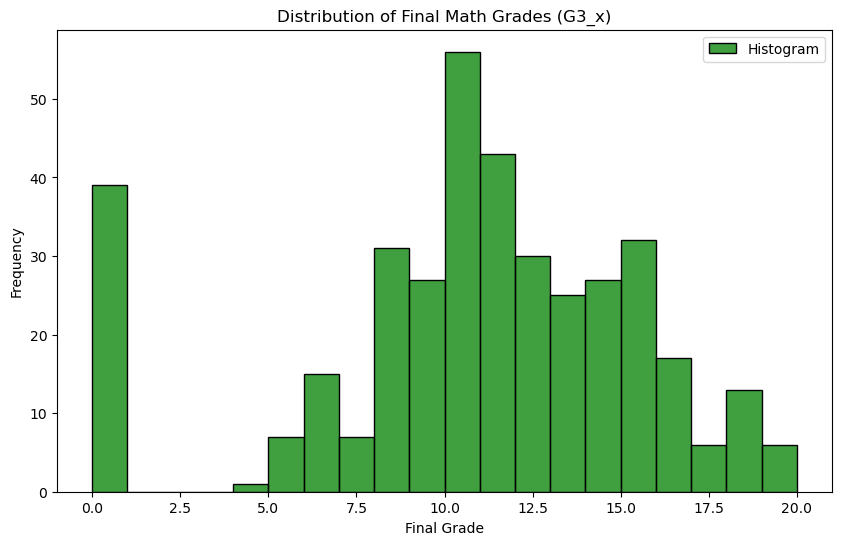

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))

# Histogram
sns.histplot(d3['G3_x'], bins=20, kde=False, color='green', label='Histogram')


plt.title('Distribution of Final Math Grades (G3_x)')
plt.xlabel('Final Grade')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [7]:
mean_g3_x = d3['G3_x'].mean()
median_g3_x = d3['G3_x'].median()
mode_g3_x = d3['G3_x'].mode()[0]  # mode() returns a Series, so we take the first value

print(f"Mean of G3_x: {mean_g3_x}")
print(f"Median of G3_x: {median_g3_x}")
print(f"Mode of G3_x: {mode_g3_x}")


Mean of G3_x: 10.387434554973822
Median of G3_x: 11.0
Mode of G3_x: 10


In [8]:
g3_x_with_support = d3[d3['schoolsup_x'] == 'yes']['G3_x']
g3_x_without_support = d3[d3['schoolsup_x'] == 'no']['G3_x']


In [9]:
mean_with_support = g3_x_with_support.mean()
mean_without_support = g3_x_without_support.mean()

median_with_support = g3_x_with_support.median()
median_without_support = g3_x_without_support.median()

mode_with_support = g3_x_with_support.mode()[0]
mode_without_support = g3_x_without_support.mode()[0]

# Output the results
print(f"Mean for G3_x with support: {mean_with_support}")
print(f"Mean for G3_x without support: {mean_without_support}")

print(f"Median for G3_x with support: {median_with_support}")
print(f"Median for G3_x without support: {median_without_support}")

print(f"Mode for G3_x with support: {mode_with_support}")
print(f"Mode for G3_x without support: {mode_without_support}")


Mean for G3_x with support: 9.490196078431373
Mean for G3_x without support: 10.525679758308158
Median for G3_x with support: 10.0
Median for G3_x without support: 11.0
Mode for G3_x with support: 10
Mode for G3_x without support: 10


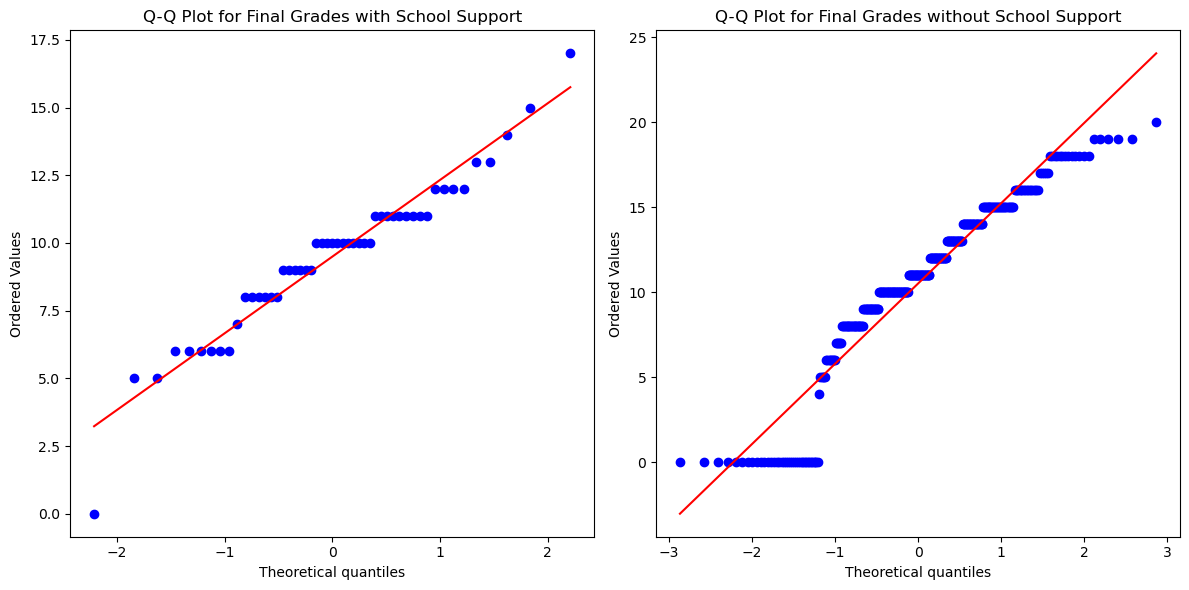

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats


# Split the data into groups based on 'schoolsup_x'
group_with_support = d3[d3['schoolsup_x'] == 'yes']['G3_x']
group_without_support = d3[d3['schoolsup_x'] == 'no']['G3_x']

# Create Q-Q plots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Q-Q plot for the group with school support
stats.probplot(group_with_support, dist="norm", plot=ax[0])
ax[0].set_title('Q-Q Plot for Final Grades with School Support')

# Q-Q plot for the group without school support
stats.probplot(group_without_support, dist="norm", plot=ax[1])
ax[1].set_title('Q-Q Plot for Final Grades without School Support')

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()


In [11]:
print(len(group_with_support),len(group_without_support))

51 331


In [12]:
from scipy.stats import mannwhitneyu

# Mann-Whitney U test
stat, p = mannwhitneyu(group_with_support, group_without_support)

print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpretation
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')


Statistics=6411.500, p=0.006
Different distribution (reject H0)


So, as p is less than 0.05, we have sufficient evidence to reject the null hypothesis(Says no difference between final grades of mathematics for students with school support and without school support). Mann-whitney U test doesn't tell the direction. But by observing the mean of two groups before we can say that the group without support had a higher mean and median grade, suggesting that the school support, as it's currently implemented, may not be positively impacting grades or that it's being given to those who are already at a disadvantage.The school support it needed for the poor students.

This insight can be valuable for educators and policymakers as it can inform decisions about how to better design and allocate resources for school support programs.

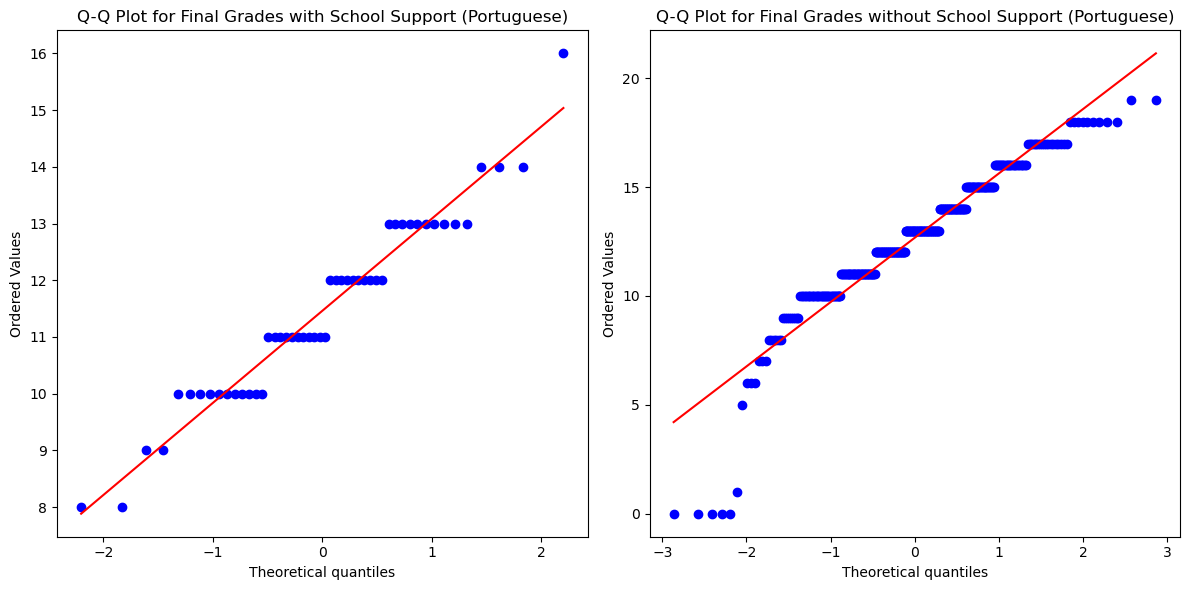

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Split the data into groups based on 'schoolsup_y'
group_with_support_y = d3[d3['schoolsup_y'] == 'yes']['G3_y']
group_without_support_y = d3[d3['schoolsup_y'] == 'no']['G3_y']

# Create Q-Q plots for the Portuguese course
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Q-Q plot for the group with school support in Portuguese
stats.probplot(group_with_support_y, dist="norm", plot=ax[0])
ax[0].set_title('Q-Q Plot for Final Grades with School Support (Portuguese)')

# Q-Q plot for the group without school support in Portuguese
stats.probplot(group_without_support_y, dist="norm", plot=ax[1])
ax[1].set_title('Q-Q Plot for Final Grades without School Support (Portuguese)')

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()


In [14]:
print(len(group_with_support_y),len(group_without_support_y))

50 332


We have two different-sized groups (50 for with support and 332 for without support) and we're not certain if the variances of the two populations are equal, Welch’s test is more appropriate:

Unequal Sample Sizes: The large discrepancy in sample sizes increases the likelihood that any difference in population variances will skew the results of a standard t-test. Welch’s test corrects for this by adjusting the degrees of freedom used in the significance test.

Unknown Variance Equality: Without conducting a formal test for equal variances (such as Levene's test or an F-test), it's safer to assume that the variances might be unequal, especially considering the samples come from populations that could have different variability (students with and without support).

Robustness: Welch’s test is more robust to violations of the equal variance assumption and is still valid even if the variances are equal. Therefore, it is often recommended as a safer choice in applied settings where the assumption of equal variances may not be verifiable.

In [15]:
# Calculate the variances
variance_with_support = np.var(group_with_support_y, ddof=1)  # ddof=1 for sample variance
variance_without_support = np.var(group_without_support_y, ddof=1)  # ddof=1 for sample variance

print('Variance with support:', variance_with_support)
print('Variance without support:', variance_without_support)


Variance with support: 2.620816326530614
Variance without support: 9.40443344374476


In [16]:
# Performing Welchs test 
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(group_with_support_y, group_without_support_y, equal_var=False)

print(f'T-statistic: {t_stat}')
print(f'p-value: {p_value}')


T-statistic: -4.274805301904922
p-value: 4.051720908004879e-05


The results from Welch's t-test show:

T-statistic: -4.275
p-value: 0.0000405 (or 4.05e-05)
The T-statistic is negative, indicating that the mean of the first group (students with school support) is lower than the mean of the second group (students without school support).

The p-value is much lower than the standard alpha level of 0.05, indicating that the difference in means between the two groups is statistically significant. Therefore, you would reject the null hypothesis that there is no difference in the mean final grades (G3_y) for Portuguese between students with school support and those without it.

This result suggests that there is a meaningful difference in performance between the two groups. Given the negative T-statistic, it implies that the group with school support has a lower mean score than the group without support. This would be a point of concern and interest for educational researchers and practitioners, as it may suggest that the support provided is not effectively enhancing student performance, or that the support is being given to those who are already at a disadvantage, as previously discussed. It would be important to further investigate why this is the case and how the support program could be improved.